# Bit Bikes!

Alle libraries importen.

In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, timedelta

Data sets inladen met pandas.

In [4]:
df2020 = pd.read_csv('divvy-tripdata/202007-divvy-tripdata.csv')
df2021 = pd.read_csv('divvy-tripdata/202107-divvy-tripdata.csv')
df2022 = pd.read_csv('divvy-tripdata/202207-divvy-tripdata.csv')

We voegen de data van 2020, 2021 en 2022 bij elkaar. De nieuwe dataset noemen we **allData**. De nieuwe kolom genaamt **year** bevat alle jaren van alle datasets. We maken nog een nieuwe kolom genaamt **day** waar we de dagen van de maand juli per jaar pakken, dit gaan we later gebruiken. 

In [5]:
frames = [df2020, df2021, df2022]
allData = pd.concat(frames)
allData['year'] = pd.to_datetime(allData['started_at'], format='mixed', dayfirst=True).dt.year
allData['started_at_date'] = pd.to_datetime(allData['started_at'], format='mixed', dayfirst=True)
allData['started_at_date'] = allData['started_at_date'].dt.date

We gaan nu alle members en casuals tellen per jaar door het jaar te checken in de nieuwe data set en die te tellen met **value_counts**. Dan nemen we de nieuwe variabelen **countmc** en doen we min elkaar zodat we de member en casual count krijgen per jaar.

In [6]:
countmc2020 = allData[allData['year'] == 2020]['member_casual'].value_counts()
countmc2021 = allData[allData['year'] == 2021]['member_casual'].value_counts()
countmc2022 = allData[allData['year'] == 2022]['member_casual'].value_counts()
membercasual2020 = countmc2020
membercasual2021 = countmc2021 - countmc2020
membercasual2022 = countmc2022 - countmc2021
membercasual2020 = df2020.value_counts('member_casual')
membercasual2021 = df2021.value_counts('member_casual')
membercasual2022 = df2022.value_counts('member_casual')

## Member en casual populariteit door afgelopen jaren.
We gaan nu de nieuwe variable plotten met pie chart in een subplot. We kunnen dan nu het verschil van members en casuals count per jaar in procenten bekijken. Met een subplot kunnen we de jaren met elkaar vergelijken. Met een **Pie Chart** kunnen we het verschil gemakkelijk zien tussen member, casual in procenten.

Text(0.5, 1.0, '2022')

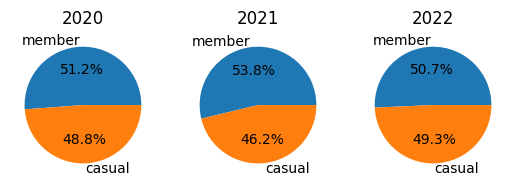

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=3)

ax[0].pie(membercasual2020, labels = membercasual2022.index, autopct='%1.1f%%')
ax[1].pie(membercasual2021, labels = membercasual2022.index, autopct='%1.1f%%')
ax[2].pie(membercasual2022, labels = membercasual2022.index, autopct='%1.1f%%')
ax[0].set_title("2020")
ax[1].set_title("2021")
ax[2].set_title("2022")

We zien dat het door de jaren heen vrij gelijk blijft. We zien geen heftige veranderingen. In 2021 zien we een stijging, maar helaas in 2022 weer een daling bij de members. Bij de casuals is het dus andersom. Houd er wel rekening mee dan de cijfers van de memeber en casuals gestegen zijn. Dus er lijkt een daaling, maar er zijn als nog meer members en casuals bij gekomen dan de jaren er voor.

## Gehuurde fietsen door de jaren heen.
We maken hier een plot om de gehuurde fietsen door de jaren 2020, 2021 en 2022 te kunnen zien. Met onze nieuwe gemaakte kolom zonder de tijd kunnen we er een plot van maken en per jaar de hoeveelheid gehuurde fiesten gemakkelijk zien.

Text(0, 0.5, 'Aantal fietsen verhuurd')

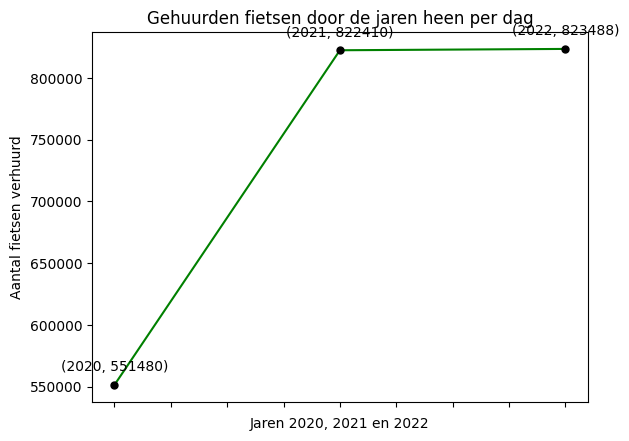

In [8]:
plot = allData.groupby('year')['ride_id'].count()
x = plot.index
y = plot.values
plot.plot(x=x, y=y, marker='.', color='green', ms='10', mfc='black', mec='black')

for i, (xi, yi) in enumerate(zip(x, y)):
    plt.annotate(f'({xi}, {yi})', (xi, yi), textcoords="offset points", xytext=(0, 10), ha='center')
 
plt.gca().set_xticklabels([])
plt.title('Gehuurden fietsen door de jaren heen per dag')
plt.xlabel('Jaren 2020, 2021 en 2022')
plt.ylabel('Aantal fietsen verhuurd')


Als we naar de lijn grafiek kijken zien we een stijgende lijn van het gebruik per dag van de fietsen. Tussen het jaar 2021 en 2022 is de stijging wat minder, maar de lijn gaat nog steeds omhoog met 1078 gehuurde fietsen.

## Meest verhuurde fietsen door de jaren heen.

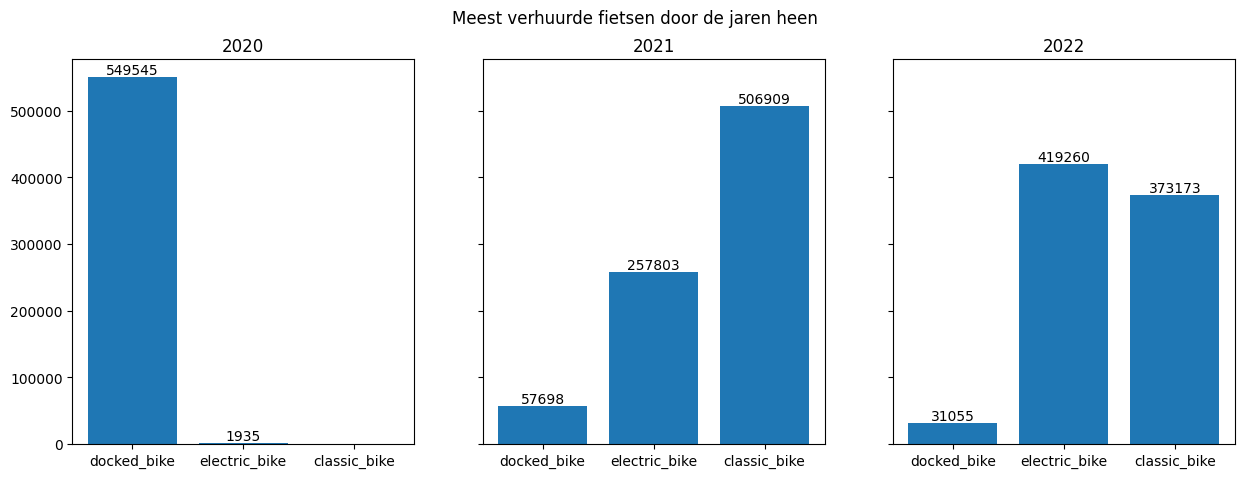

In [9]:
fiets2020 = allData[allData['year'] == 2020]['rideable_type'].value_counts()
fiets2021 = allData[allData['year'] == 2021]['rideable_type'].value_counts()
fiets2022 = allData[allData['year'] == 2022]['rideable_type'].value_counts()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5), sharey=True, sharex=True)
fig.suptitle('Meest verhuurde fietsen door de jaren heen')
bars1 = ax[0].bar(x=fiets2020.index, height=fiets2020.values)
bars2 = ax[1].bar(x=fiets2021.index, height=fiets2021.values)
bars3 = ax[2].bar(x=fiets2022.index, height=fiets2022.values)
ax[0].set_title("2020")
ax[1].set_title("2021")
ax[2].set_title("2022")
ax[0].bar_label(bars1, fmt='%d')
ax[1].bar_label(bars2, fmt='%d')
ax[2].bar_label(bars3, fmt='%d')
plt.show()

We zien dat over het algemeen in deze barchart de electric bikes enorm gestegen zijn. En dat de docked bikes enorm gedaald zijn. De nieuwe classic bikes in het jaar 2021 zijn populair geworden. Als we kijken naar de stijging van de electric bikes zou het slim zijn om in 2023 meer electric bikes aan te schaffen. De stijging gaat met ongeveer 150000 electric bikes van 2021 op 2022. In 2023 zou je dan ongeveer de zelfde stijging kunnen verwachten. De docked bikes zo min mogelijk aanschaffen. Zoals dat er nu uit ziet met daling van wel bijna 500000 kan je zelfs een heleboel verkopen. De barchart laat duidelijk de verschillen zien tussen de types van de bikes en of ze per jaar groter of kleiner worden per jaar. In 2020 waren er nog geen clasic bikes dus vandaar dat classic_bike geen waardes heeft.

## Member casual per fiets type per jaar.
Het is handig om niet alleen te weten wat voor soort fietsen het meeste gehuurt worden, maar ook wat daarvan members en casuals zijn. Dat geeft een nieuwe kijk op de data en meer informatie voor bijvoorbeeld het marketing team.

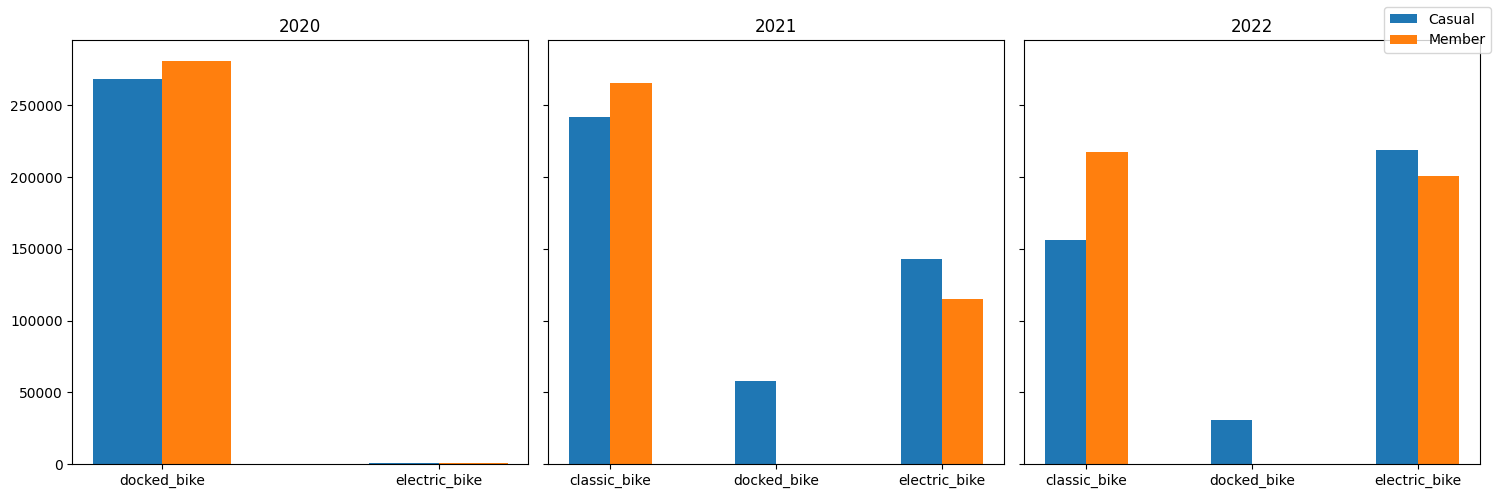

In [10]:
BikeTypesPerMemberCasual_2020 = df2020.groupby(['member_casual', 'rideable_type']).size().unstack(fill_value=0)
BikeTypesPerMemberCasual_2021 = df2021.groupby(['member_casual', 'rideable_type']).size().unstack(fill_value=0)
BikeTypesPerMemberCasual_2022 = df2022.groupby(['member_casual', 'rideable_type']).size().unstack(fill_value=0)

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

width = 0.25
bike_type_2020 = BikeTypesPerMemberCasual_2020.columns
x_2020 = np.arange(len(bike_type_2020))

casualAantal_2020 = BikeTypesPerMemberCasual_2020.loc['casual']
memberAantal_2020 = BikeTypesPerMemberCasual_2020.loc['member']

casualBars_2020 = axs[0].bar(x_2020 - width/2, casualAantal_2020, width, label='Casual')
memberBars_2020 = axs[0].bar(x_2020 + width/2, memberAantal_2020, width, label='Member')
axs[0].set_title("2020")
axs[0].set_xticks(x_2020)
axs[0].set_xticklabels(bike_type_2020)

bike_type_2021 = BikeTypesPerMemberCasual_2021.columns
x_2021 = np.arange(len(bike_type_2021))
casualAantal_2021 = BikeTypesPerMemberCasual_2021.loc['casual']
memberAantal_2021 = BikeTypesPerMemberCasual_2021.loc['member']

casualBars_2021 = axs[1].bar(x_2021 - width/2, casualAantal_2021, width, label='Casual')
memberBars_2021 = axs[1].bar(x_2021 + width/2, memberAantal_2021, width, label='Member')
axs[1].set_title("2021")
axs[1].set_xticks(x_2021)
axs[1].set_xticklabels(bike_type_2021)

bike_type_2022 = BikeTypesPerMemberCasual_2022.columns
x_2022 = np.arange(len(bike_type_2022))

casualAantal_2022 = BikeTypesPerMemberCasual_2022.loc['casual']
memberAantal_2022 = BikeTypesPerMemberCasual_2022.loc['member']

casualBars_2022 = axs[2].bar(x_2022 - width/2, casualAantal_2022, width, label='Casual')
memberBars_2022 = axs[2].bar(x_2022 + width/2, memberAantal_2022, width, label='Member')
axs[2].set_title("2022")
axs[2].set_xticks(x_2022)
axs[2].set_xticklabels(bike_type_2022)

fig.legend(["Casual", "Member"], loc="upper right")
plt.tight_layout()
plt.show()

We kijen per jaar naar de bike types en door wie de bike types het meest gebruikt wordt. In 2020 waren er nog geen clasic bikes dus vandaar maar 2 waardes. Ook zien we dat de electric bike niet zo populair was zowel bij de members als casuals. Meer daar over hier boven te vinden. In 2021 en 2022 zien we iets opvallend, de docked bikes worden deze jaren 0 keer gebruikt door een member. Een verklaaring daarvoor zou kunnen zijn dat de members geen docked bike konden huren juist omdat zij members waren. De classic bikes worden het meeste gebruikt door de members, maar ook veel door de casuals. De electric bikes worden het meest gebruikt door casuals behalve in 2020.

## Member casual per fiets type gemiddeld.

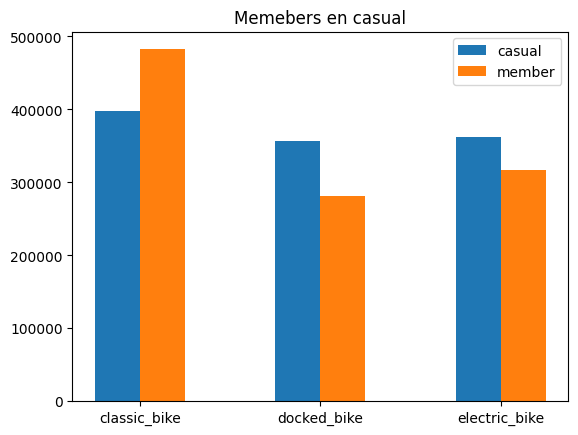

In [11]:
BikeTypesPerMemberCasual = allData.groupby(['member_casual','rideable_type']).size().unstack(fill_value=0)
width = 0.25
bike_type = BikeTypesPerMemberCasual.columns
x = np.arange(len(bike_type))

fig, ax = plt.subplots()

casualAantal = BikeTypesPerMemberCasual.loc['casual']
memberAantal = BikeTypesPerMemberCasual.loc['member']

casualBars = ax.bar(x - width/2, casualAantal, width, label='Casual')
memberBars = ax.bar(x + width/2, memberAantal, width, label='Member')
plt.legend(["casual", "member"], loc="upper right")
ax.set_title("Memebers en casual")
ax.set_xticks(x)
ax.set_xticklabels(bike_type)

plt.show()

Dit zijn alle gemiddelde door de jaren heen. Houd er wel rekening mee dat de classic bike nog niet bestond in 2020. Het gemiddelde van de classic bike is dus alleen van 2021 en 2022. Over het algemeen lopen de members en casual best wel gelijk op, maar we zien wel dat meer casuals zijn per bike types behalve bij de classic bikes.

## Advies voor Bit Bikes.

Bit Bike zou moeten overwegen om meer electric bikes aan te schaffen, omdat daar de meest stijging in zit en veel vraag naar is. Het is verstandig om het aantal docked bikes te verminderen vanwege hun dalende gebruik. Members maken vooral gebruik van classic bikes, terwijl casuals vaker kiezen voor electric bikes. Met behulp van deze inzichten zou je de aankopen van de fiesten van de volgende jaren kunnen aanpassen. Door de data van ook de toekomstige jaren goed in de gaten te houden kan je blijven voorspellen van de populairieteit van de fietsen en memebrs en/of casuals.